In [23]:
import utils
import numpy as np
from numba import jit
import cv2
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import stats

In [24]:
filename = "mej.png"
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

In [25]:
import numpy as np
import pylab as py
import radialProfile 

/Users/yingertang/opt/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

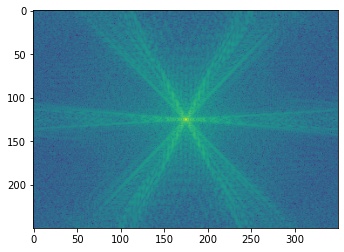

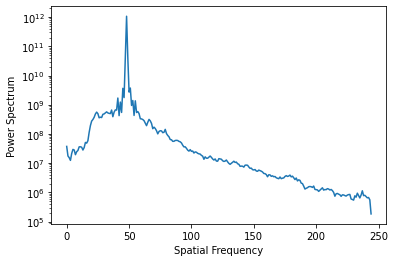

In [26]:
F1 = np.fft.fft2(image)
F2 = np.fft.fftshift( F1 )
psd2D = np.abs( F2 )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1D = radialProfile.azimuthalAverage(psd2D)

# Now plot up both
py.figure(1)
py.clf()
py.imshow( np.log10( image ), cmap=py.cm.Greys)

py.figure(2)
py.clf()
py.imshow( np.log10( psd2D ))

py.figure(3)
py.clf()
py.semilogy( psd1D )
py.xlabel('Spatial Frequency')
py.ylabel('Power Spectrum')

py.show()


In [ ]:
def naive(target_image):
    TotalHologram = np.zeros([target_image.shape[0], target_image.shape[1] ,3])
    Hfield = np.fft.ifft2(np.fft.ifftshift(np.sqrt(target_image)))
    Phase = np.angle(Hfield) > 0
    
    for i in range(3):
        TotalHologram[:, :, i] = Phase * 255
    
    return TotalHologram



In [ ]:
if __name__ == "__main__":
    filename = 'images/transformed_grid.jpg'
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    hologram = naive(image)
    cv2.imwrite('holograms/naive.bmp', hologram)